In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lrutils
from lrutils import generate_data, plot_abline
%matplotlib inline


# Multivariate Linear Regression

## Quick refresher

The general form of a multivariate regression is

$$
y \approx w_{0} +
w_{1} x_{1} + w_{2} x_{2} + \cdots + w_{p}x_p
$$

where $y$ is the response vector and $x_{1},…,x_{p}$ are the features (covariates). 
Each of the predictor variables must be numerical. 
The parameters (coefficients) $w_0,…,w_p$ correspond to the *effect* of each feature after taking account of the effect of all other features in the model. 

It is convenient to write this in matrix form where all the values of the forecast variable are given in a single equation. 

$$
X = \left[\begin{matrix} 1 & x_{1,1} & x_{2,1} & \dots & x_{p,1}\\ 1 & x_{1,2} & x_{2,2} & \dots & x_{p,2}\\ \vdots & \vdots & \vdots & & \vdots\\ 1 & x_{1,n} & x_{2,n} & \dots & x_{p,n} \end{matrix}\right].
$$

The first column correspond to the intercept ($w_0$) which does not multiply a feature.

The problem then becomes one of finding $w\in\mathbb R^p$ such that $y\approx Xw$ or such that

$$ L(w) \quad\!\!=\quad\!\! \|y - Xw\|_2^2 $$

is minimized.

----------------------

## Exercises

In what follows, we will make use of the following material, covered in Module 1:

* Python functions
* Linear algebra: norms, and matrix products.
* Optimization (gradient descent).



We will work on a simple dataset with two variables $x$ and $y$. Have a look at the data (e.g. using a scatterplot).

In [2]:
# load the data
np.random.seed(1000)
x, y = generate_data(200)

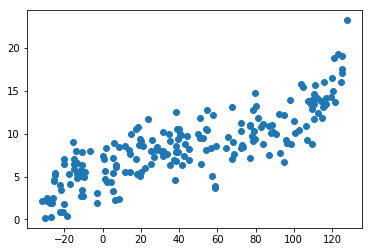

In [3]:
plt.scatter(x, y)

In this example, the linear relationship is evident, though there are a few stray points at the top and at the bootom.

##### Step 1: Initialise
1\. First initialise $w$ to any array of size $2$.

2\. As explained above, the convention in linear regression is to remove the constant term from the model and make the first column of the data matrix a column of 1s.

Using `numpy`, concatenate a column of ones to the data matrix $X$

$ X \leftarrow [\mathbf{1}\,\,\, X] $

<br>
<br>
Hints for part (2):
* First construct a $200 \times 1$ array of ones. See: `np.ones`
* Then concatenate the columns together using `np.hstack`
* Both these functions take an argument of tuples, so you'll need to use two sets of brackets.




In [4]:
#we will initialise w to some value. Because we have a two dimensional matrix of x which is the original one dimensional matrix
#concatenated with a vector of 1, we will need a two dimensional y so use for example, zeros from the numpy library.
#Then we concantenate that vector of ones on to our matrix x. We can do this using a number of different numpy functions such as
#hstack or concatenate, etc. First let us create a vector of ones. This needs to be a tuple instead of just (200, 1) or numpy
#will not understand the data type. Of note is the fact that we have a two dimensional array 200 x 1
w = np.zeros(2)
one = np.ones((200, 1))
X = np.hstack((one, x))



In [5]:
X

array([[ 1.00000000e+00,  7.25743337e+01],
       [ 1.00000000e+00, -1.35988891e+01],
       [ 1.00000000e+00,  1.20045258e+02],
       [ 1.00000000e+00,  4.51506242e+01],
       [ 1.00000000e+00,  1.07595926e+02],
       [ 1.00000000e+00,  1.97322895e+00],
       [ 1.00000000e+00, -2.54864600e+01],
       [ 1.00000000e+00,  3.15511138e+01],
       [ 1.00000000e+00,  5.30115158e+00],
       [ 1.00000000e+00,  1.02678516e+02],
       [ 1.00000000e+00,  1.13317510e+00],
       [ 1.00000000e+00,  8.67951254e+01],
       [ 1.00000000e+00,  3.07446604e+01],
       [ 1.00000000e+00, -2.83895681e+00],
       [ 1.00000000e+00,  8.69663063e+01],
       [ 1.00000000e+00, -2.08668670e+01],
       [ 1.00000000e+00,  1.09653953e+02],
       [ 1.00000000e+00,  1.20423104e+02],
       [ 1.00000000e+00,  1.16982950e+02],
       [ 1.00000000e+00,  3.44689525e+01],
       [ 1.00000000e+00, -2.73629345e+01],
       [ 1.00000000e+00,  1.25124398e+02],
       [ 1.00000000e+00,  2.23420294e+01],
       [ 1.

##### Step 2: Predicted Values
Create a function that outputs the predicted values $\hat{y}$ given the current value of $w$.

Recall that $\hat{y} = Xw$

In [6]:
def predicted_values(w, X):
    # calculate y_pred
    y_pred = X @ w           #@ is the matrix multiplication symbol or we could write np.dot(X, w)
    return y_pred

##### Step 3: Loss Function
Create a function that calulates the current loss of our predictions $\hat{y} = Xw$ using the squared $L_2$ norm.

In [7]:
def loss_function(w, X, y):
    # calculate the residual r = y_hat - y
    y_hat = predicted_values(w, X)
    r = y - y_hat
    
    # calculate the squared norm, or the sum of squares of `r`.
    # You can code this directly, or use the norm functions
    # discussed in module 1.
    #several ways to write this:
    #loss = np.linalg.norm(y - y_hat)**2 
    #loss = np.sum(q**2 for q in r)
    #loss = np.linalg.norm(r)**2
    loss = np.sum(r**2)
    return loss

In [8]:
#let us check that some og those equations work
predicted_values(w, X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
#let us test with ones
predicted_values(np.ones(2), X)

array([ 73.57433367, -12.5988891 , 121.0452583 ,  46.15062423,
       108.59592563,   2.97322895, -24.48646004,  32.55111382,
         6.30115158, 103.67851588,   2.1331751 ,  87.79512537,
        31.74466045,  -1.83895681,  87.96630633, -19.86686704,
       110.6539527 , 121.42310388, 117.98294955,  35.46895249,
       -26.3629345 , 126.12439754,  23.34202938,  82.06995102,
        26.90033082, -25.38305633, 105.80932052,  74.1605613 ,
        91.50927906,  57.65395808, 110.61486986, 113.67161846,
       -29.33252791, -19.07092222,   8.14067356,  -9.67123961,
        80.66801607,  32.71278136, 110.29955062,  -2.03879836,
        38.19986749, -28.09708756,  79.63005787,  44.15050433,
       -10.48444966, 111.61392821, 115.91257992, -19.30064101,
       -23.72832908,  39.17166332,  65.27534878,  18.63632543,
        78.10531872,   2.44210413,  52.13668756,  59.55821289,
        39.58678281,  -8.99101485,   3.16691058,  -9.66049726,
        20.56747224,   6.42193843,  53.39970496,  59.55

In [10]:
#let us also test the loss function
loss_function(np.ones(2), X, y)

675435.220830736

##### Step 4: Gradient
Recall that the gradient of our function is (after some algebraic manipulation):

$$ \nabla_w L \quad\!\!=\quad\!\! -X^T (y - Xw) \quad\!\!=\quad\!\! -X^T r $$

for residuals $r$. Create a function that returns the gradient for a given value of $w$ (and $X$ and $y$).


In [11]:
def gradient(w, X, y):
    y_hat = predicted_values(w, X)
    r = y - y_hat
    grad = -X.T @ r
    return grad

##### Step 5: Optimise!
Using the SimpleGD function from Module 1, perform 1000 steps of gradient descent and plot the evolution of the function values returned.

We've included a slightly modified version of the gradient descent function as we are now performing optimisation of a *vector* quantity rather than a scalar quantity, and we will just return the final value of the variable rather than all the intermediate ones.

We recommend using a very small step size to begin with: try $\gamma = 10^{-6}$.

Hint: if your loss increases towards $\infty$, try resetting $w$ and reducing the stepsize.

<span style="color:red"><b>Warning: If you have generated data with n > 200, you will need to decrease the step size from our recommendation, perhaps significantly.</b></span>

In [12]:
#Let us see what some of these arguments represent. remember here we are optimising over a multivariate while previous we were
#optimising over a scalar. 
#the parameters of the simpleGD function:
#x0 is the starting value of the parameter that we are optimising, secondly we have
#f which is the function f that defines the objective that we are optimising. This is used to see how our objective values change
#over time. 
#g is the gradient function which calculates in the direction in which we take a step. 
#gamma is the step size which is how far we travel in the direction of the gradient
#nr_steps is the number of steps

#you can see that we have almost everything for the simpleGD function, however, we do not have f and g
#so in this case x0 will be our current value of zero
#and our simpleGD function will spit out a partially optimised w
#so as far as this optimisation function is concerned, the only thing you care about is w
#the fact that we have x and y as input to our function as we saw in the previous codes will cause confusion, because it is 
#trying to input the values to f and g as we can see here
#so we need to create wrappers for these functions that always pass in the values of x and y that are in the environment
#these are created in the codes below as lossXy and gradient_Xy


# Modified simpleGD function
def simpleGD(x0, f, g, gamma, nr_steps):
    history = np.zeros(nr_steps+1)
    history[0] = f(x0)
    x = x0
    for ii in range(nr_steps):
        # this formulation amounts to writing x = x - stepsize*g(x)
        x -= gamma*g(x)
        history[ii+1] = f(x)
    return x, history

In [13]:
# create versions of your loss and gradient functions that only require `w` as an input
# (hint: you might want to use a lambda function.)

loss_Xy = lambda w: loss_function(w, X, y)
gradient_Xy = lambda w: gradient(w, X, y)

In [14]:
# Perform gradient descent on your loss function, 
# w, history = simpleGD(...
w, history = simpleGD(w, loss_Xy, gradient_Xy, 1e-6, 1000)


##### Step 6: Optimisation Diagnostics
Plot the history of your loss over your iterates. 
* Does it decrease or increase? 
    * If increasing, reset your $w$ and optimize again with a smaller step size.
    * If this doesn't fix the issue, you may have a bug in your code.
* How quickly does it decrease?
* Does it look like it's converging?
* [**Question**] How might you speed up the convergence?

Hint: be *very* careful when increasing the step size!

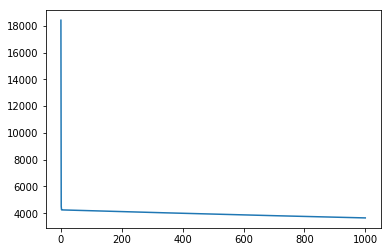

In [15]:
plt.plot(history)


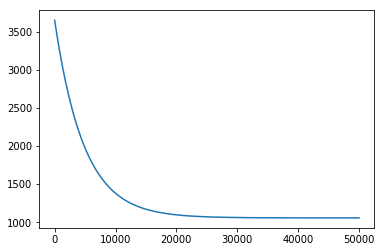

In [16]:
#notice that the does not converge, increasing the step size to 50,000 shows improved convergence

w, history = simpleGD(w, loss_Xy, gradient_Xy, 1e-6, 50000)
plt.plot(history)

##### Step 7: Review the model fit
Plot your predictions against the data.

* Create a scatterplot of the original data points (see above for an example).
* Using the below function, draw the regression fit.
* How well does the regression line fit the data?
* Is this a problem with the optimisation or the model? Try performing a few '000s more iterations.

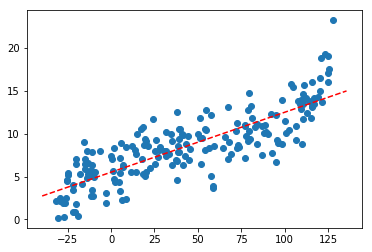

In [17]:
plt.scatter(x, y)
plot_abline(w[1], w[0], '--', color='red')
# plot_regression_line(w)

All being well, you should have a line fitting your data reasonably well. If so, congratulations, you've coded up your first machine learning algorithm!

Notice that while we've applied this algorithm to a 2D dataset, in principle it can be applied to a dataset of any dimension. If you have time, consider trying again with the data generated from:

```python
np.random.seed(3)
x, y = lrutils.generate_data3d(200)
```
Be aware that your `x` variable now has *two* columns.